# CS 237: Homework 1 Programming Exercises

In [4]:
# Here are some imports which will be used in the code in the rest of the notebook

# Jupyter notebook specific 
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt   # normal plotting

from numpy.random import seed, randint, uniform
from collections import Counter

# Exercise 1 
Read and understand the function $\texttt{dieRoll(n_trials)}$ below, which simulates the experiment of rolling a fair, six-sided die $\texttt{n_trials}$ times. 
- The sample space is $\{1,2,3,4,5,6\}$. 
- The experiment is equi-probable, i.e., the probability of any particular outcome is $\frac{1}{6}$.
- If we record the outcome for a large number of experiments, we would expect the number of outcomes to be evenly distributed. In other words, for a large number of trials, we would expect $$\frac{\text{number of times we observed a } k}{\texttt{n_trials}} \approx \frac{1}{6}$$ for $k\in \{1,2,3,4,5,6\}$

TO DO: For this first exercise, simply provide the single line of Python code which would display a histogram of the results of the experiment for 10000 trials with appropriate labels.  

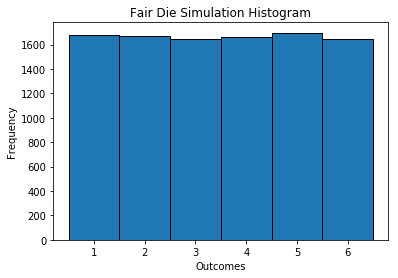

In [5]:
def roll_die(n_trials = 10000, seed=-1):
    """
    - Simulates rolling a fair die n_trials times, i.e., a number is selected from 
    - (1,2,3,4,5,6) with equal probability n_trials times. By default, n_trials is set to 10000
    - randint(a,b) uniformly and randomly selects an  integer x such that a<= x < b
    - The second argument for randint determines the shape and size of the result array. In this case, we only need
    - a one dimensional array (a list)
    """
    trials_and_results = randint(1,7,(n_trials)) # this creates a 1D array of length n_trials of random integers 1..6
    return trials_and_results

example_trials = roll_die() 
plt.hist(example_trials,bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5],edgecolor='black')
plt.title('Fair Die Simulation Histogram')
plt.xlabel("Outcomes")
plt.ylabel("Frequency")
plt.show()


In [3]:
# Solution:   For each exercise, you should add a cell and provide your code solution

# Exercise 2 

Now we will display the same results showing the distribution of probabilities, instead of an explicit histogram.
- To calculate the probabilities, you will need to count the number of occurrences of each of the outcomes, you may find the function Counter(...) useful for this (Google "numpy Counter" to find out how this works); 
- Once you have the frequency of each outcome, divide by the total number of trials to get the probability for each.

TO DO:  Complete the function stub below which takes the list returned by roll_die(...), or any other experiment returning numerical results, and produces a frequency distribution; this should have the same shape as the histogram, but the Y axis will be probabilities instead of the frequency. Again, create appropriate labels. Demonstrate your function, again, on the list example_trials produced in Exercise 1. 

In [2]:
def show_distribution(results, title='Probability Distribution'):
    """
    - Takes a list of numerical outcomes and displays a distribution of the probabilities
    """
    
    dic = Counter(results)
    keys = sorted(dic.keys())
    values = np.zeros(len(keys))
    n_trials = sum(dic.values())

    for i in range(len(keys)):
        values[i]= dic[keys[i]]/n_trials
                
    labels = []
  
    for key in keys:
        labels.append(str(key))
   
    plt.xticks(keys, labels)
    plt.hist(keys,values, width=1, edgecolor='black')
    plt.title(title)
    plt.ylabel("Probability")
    plt.xlabel("Outcomes")
    plt.show()
    
    

show_distribution(example_trials,title='Probability Distribution for Single Die Toss')

NameError: name 'example_trials' is not defined

# Motivation for simulation
For the case of a fair die, the distribution is very easily computed. In general, it is very difficult to write down a closed form solution for the distribution of real world events. This is where simulation comes into play-- instead of  mathematically computing the distribution explicitly, you can use this method of repeating experiments, and recording outcomes to understand the probabilistic rules governing some real world event. When you can come up with an analytical result, this is a nice way of confirming its correctness!

# Exercise 3
You will now do the same thing you did in the previous exercises, but with a new experiment: instead of rolling one die and recording the value, you will simulate rolling $n$ dies and recording their sum. For example, if $n=2$ and  the first die shows up as a 3, and the second die shows up as a 1, the sum (and the value we record) would be 4. 

TO DO:  Complete the two functions stubs below and then demonstrate by providing the single line of code which would print out the probability distribution for rolling 2 dice 10,000 times. 

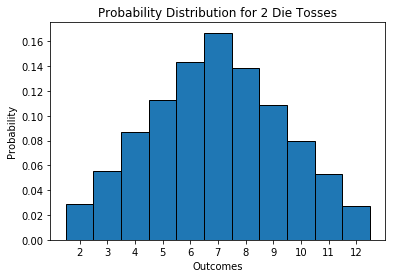

In [24]:
# Hint, use help() on randint or Google!
# You can generate random lists of numbers with one line of code
# This function should look very similar to rollDie()

def roll_and_add_dice(n_dice ,n_trials = 10000):
    """
    - Perform the trials
    - randint(a,b) uniformly and randomly selects an  integer x such that a<= x < b
    - The second argument determins the shape of the result. In this case, we only need
    - a one dimensional array ( a list)
    """
    result = []
    dice_sum = 0
    for trials in range(n_trials):
        arr = randint(1,7,(n_dice))
        dice_sum = np.sum(arr) 
        result.append(dice_sum)
        dice_sum= 0
    return result

trial_and_result= roll_and_add_dice(2)
show_distribution(trial_and_result,title='Probability Distribution for 2 Die Tosses')


# Now use show_distribution to display results

# Exercise 4

TO DO:  For the final exercise, provide code which will display the probability distribution for the experiment of running the "flip a coin until you get a head" experiment 10,000 times.

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


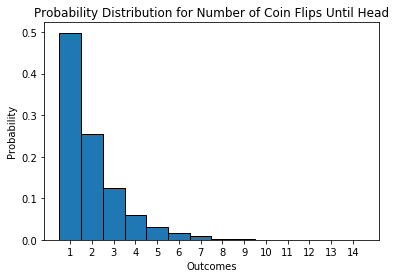

In [11]:
# returns true if flip of fair coin is heads

def fair_coin_flip():
    return (randint(0,2) == 1)

# return the number of flips until you get a head; minimum is 1 and there is no upper bound
def flip_coin_until_heads():
    counter = 1
    result = []
    
    for trial in range(10000):
        while(fair_coin_flip()==False):
            counter+=1
        result.append(counter)
        counter=1
    return result

trial_and_result= flip_coin_until_heads()
show_distribution(trial_and_result,title='Probability Distribution for Number of Coin Flips Until Head')

